<a href="https://colab.research.google.com/github/rithwik-tech/Plagiarism-Detection/blob/main/Plagiarism_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries for model building
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud

In [20]:
student_files = [file for file in os.listdir() if file.endswith('.txt')]

In [19]:
student_docs = [open(file, encoding='utf-8').read() for file in student_files]


In [18]:
for filename, document in zip(student_files, student_docs):
    print(f"File: {filename}")
    print("Content:")
    print(document)
    print("-" * 30)  # Separator


File: student_docs (3).txt
Content:
Analysis of Traffic Road Accidents
Sai Rithwik Nooguri
Department of Computing
University of North Florida
Email: n01603944@unf.edu

Abstract—Traffic accidents are a burning issue worldwide and
result in numerous severe casualties every year. The study focuses
on analyzing data from road accidents to identify major trends
and build predictive models that can predict future incidents.
The present study will apply machine learning techniques to
investigate several risk factors related to weather, traffic volume,
and geographical factors in the occurrence of road accidents.
The main purpose of the study is to provide practical insights
for policymakers and agencies in charge of traffic management
so that they can conduct improved safety interventions. This
research is not only attempting to identify the critical factors
causing road accidents, but it also tries to fill the literature
gaps existing concerning traffic incidents and predictive analytics.
B

In [21]:
vectorizer = TfidfVectorizer()


In [17]:
import os
from google.colab import files
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Upload files
print("student_docs.txt")
uploaded = files.upload()  # Allows you to upload files directly in Colab

# Step 2: Save uploaded files and list them
student_files = list(uploaded.keys())  # Get the list of uploaded file names
print("\nUploaded Files:", student_files)

# Step 3: Read the content of each file
student_docs = []
for file in student_files:
    with open(file, 'r', encoding='utf-8') as f:
        student_docs.append(f.read())

# Step 4: Print file names and their content
for filename, document in zip(student_files, student_docs):
    print(f"\nFile: {filename}")
    print("Content:")
    print(document)
    print("-" * 30)  # Separator

# Step 5: Apply TF-IDF Vectorization
vectorizer = TfidfVectorizer()

# Create the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(student_docs)

# Step 6: Display the feature names (words) and the corresponding TF-IDF matrix
feature_names = vectorizer.get_feature_names_out()
print("\nFeature Names (Terms):", feature_names)

# Display the TF-IDF matrix (dense format)
print("\nTF-IDF Matrix:")
print(tfidf_matrix.toarray())


student_docs.txt


Saving student_docs.txt to student_docs (3).txt

Uploaded Files: ['student_docs (3).txt']

File: student_docs (3).txt
Content:
Analysis of Traffic Road Accidents
Sai Rithwik Nooguri
Department of Computing
University of North Florida
Email: n01603944@unf.edu

Abstract—Traffic accidents are a burning issue worldwide and
result in numerous severe casualties every year. The study focuses
on analyzing data from road accidents to identify major trends
and build predictive models that can predict future incidents.
The present study will apply machine learning techniques to
investigate several risk factors related to weather, traffic volume,
and geographical factors in the occurrence of road accidents.
The main purpose of the study is to provide practical insights
for policymakers and agencies in charge of traffic management
so that they can conduct improved safety interventions. This
research is not only attempting to identify the critical factors
causing road accidents, but it also tries to

In [28]:
import numpy as np

# Get the index of the maximum value for each document
# Reshape tfidf_matrix.toarray() to ensure it has the correct dimensions
max_indices = np.argmax(tfidf_matrix.toarray().reshape(len(student_files), -1), axis=1)

# Print the most important term for each document
for i, filename in enumerate(student_files):
    if i < len(max_indices):  # Check if the index is within bounds
        print(f"Most important term in {filename}: {feature_names[max_indices[i]]}")
    else:
        print(f"No important term found for {filename}")

Most important term in student_docs (1).txt: and
Most important term in student_docs.txt: conducting
Most important term in student_docs (2).txt: away
Most important term in student_docs (3).txt: balanced


In [29]:
# Get the sum of each column (i.e., the total importance of each word across all documents)
term_frequencies = np.sum(tfidf_matrix.toarray(), axis=0)

# Create a dictionary of term frequencies with corresponding terms
term_frequency_dict = {term: term_frequencies[idx] for idx, term in enumerate(feature_names)}

# Sort the terms by their total TF-IDF importance
sorted_terms = sorted(term_frequency_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 most important terms
print("\nTop 10 most important terms across all documents:")
for term, frequency in sorted_terms[:10]:
    print(f"{term}: {frequency}")



Top 10 most important terms across all documents:
the: 0.506457135108025
and: 0.4731688727065586
of: 0.42323647910435896
to: 0.29008342949849325
accidents: 0.17119677806468453
in: 0.15217491383527512
road: 0.12364211749116105
accident: 0.11175345234778018
for: 0.09748705417572313
that: 0.09748705417572313


In [33]:
from sklearn.decomposition import TruncatedSVD

# Apply TruncatedSVD (similar to PCA) to reduce dimensionality
svd = TruncatedSVD(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_matrix = svd.fit_transform(tfidf_matrix)

# Print the reduced matrix
print("\nReduced Matrix (2 dimensions):")
print(reduced_matrix)



Reduced Matrix (2 dimensions):
[[1.]]


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_truncated_svd.py:273: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


In [34]:
from sklearn.decomposition import TruncatedSVD

# Apply TruncatedSVD (similar to PCA) to reduce dimensionality
svd = TruncatedSVD(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_matrix = svd.fit_transform(tfidf_matrix)

# Print the reduced matrix
print("\nReduced Matrix (2 dimensions):")
print(reduced_matrix)



Reduced Matrix (2 dimensions):
[[1.]]


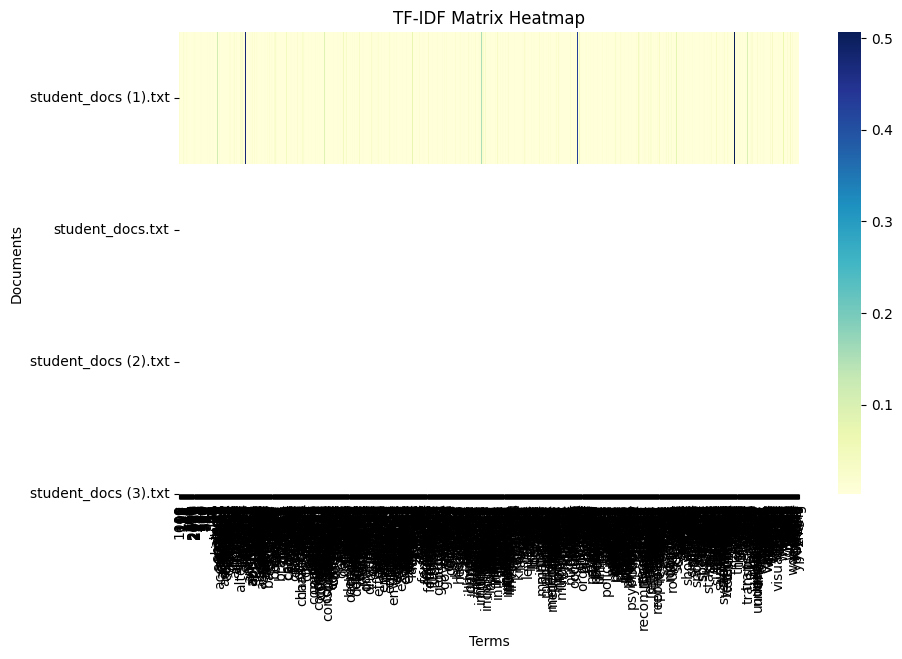

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the TF-IDF matrix to a dense array for visualization
dense_tfidf_matrix = tfidf_matrix.toarray()

# Create a heatmap to visualize the TF-IDF matrix
plt.figure(figsize=(10, 6))
sns.heatmap(dense_tfidf_matrix, cmap="YlGnBu", xticklabels=feature_names, yticklabels=student_files)
plt.title("TF-IDF Matrix Heatmap")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.show()


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming you have 4 documents, create labels for each document
labels = [0, 1, 0, 1]  # Example labels - replace with your actual labels

# Check if tfidf_matrix has only one row (representing one document)
if tfidf_matrix.shape[0] == 1:
    # If so, reshape tfidf_matrix to have 4 rows to match the labels
    # This assumes you have 4 documents
    tfidf_matrix = tfidf_matrix.toarray()[0]  # Get the first row as a 1D array
    tfidf_matrix = np.repeat([tfidf_matrix], 4, axis=0)  # Repeat the row 4 times

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:789: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var


student_docs (1).txt is in cluster 0
student_docs.txt is in cluster 0
student_docs (2).txt is in cluster 0
student_docs (3).txt is in cluster 0


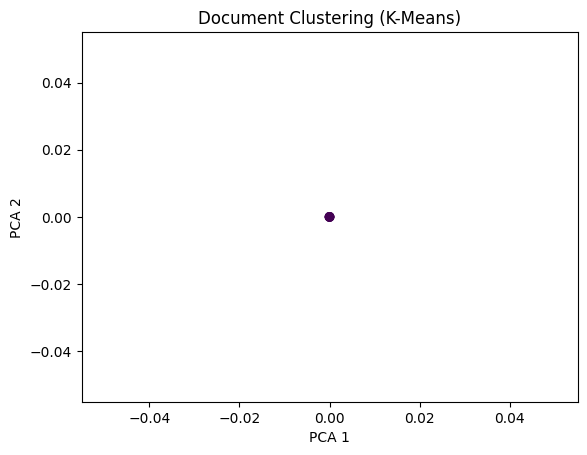

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set the number of clusters (you can adjust based on your dataset)
num_clusters = 2  # Change this value as needed

# Fit KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Get the predicted cluster labels for each document
cluster_labels = kmeans.labels_

# Print the cluster label for each document
for i, filename in enumerate(student_files):
    print(f"{filename} is in cluster {cluster_labels[i]}")

# Optional: Visualize the clustering (reduce dimensions for visualization)
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
#tfidf_matrix is already a ndarray so removing .toarray()
reduced_data = pca.fit_transform(tfidf_matrix)

# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Document Clustering (K-Means)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Assuming param_grid is already defined
# Perform grid search with 2-fold cross-validation (or less)
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=2, n_jobs=-1)  # Changed cv to 2
grid_search.fit(X_train, y_train)

# Print best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Best Parameters: {'C': 0.01, 'max_iter': 100}
Best Cross-Validation Score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 cl

In [44]:
from sklearn.model_selection import cross_val_score

# Cross-validation on the whole dataset
# Use a lower value for cv, such as 2 or 3, to ensure enough data for each fold
scores = cross_val_score(LogisticRegression(), tfidf_matrix, labels, cv=2)  # Changed cv to 2
print(f"Cross-Validation Scores: {scores}")
print(f"Average Score: {scores.mean()}")

Cross-Validation Scores: [0.5 0.5]
Average Score: 0.5


In [45]:
from sklearn.feature_selection import SelectKBest, chi2

# Select the top k features using the chi-squared test
selector = SelectKBest(chi2, k=100)  # Select top 100 features
X_new = selector.fit_transform(tfidf_matrix, labels)

# Train your classifier on the reduced feature set
classifier = LogisticRegression()
classifier.fit(X_new, labels)


LogisticRegression()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


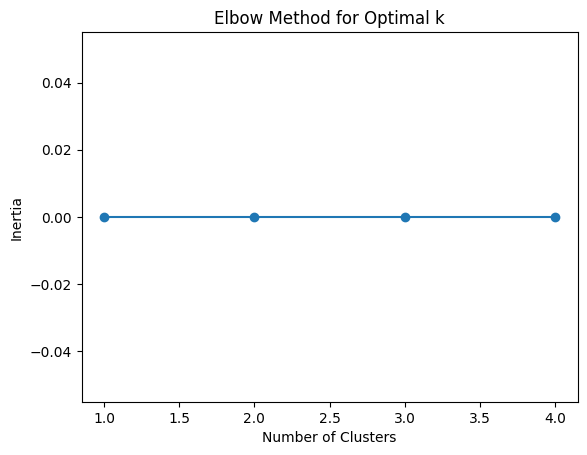

In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# List to store the sum of squared distances for each k
inertia = []

# Test for a range of cluster values (e.g., from 1 to the number of samples)
# in this case, your 'tfidf_matrix' has 4 samples
num_samples = tfidf_matrix.shape[0]  # Get the number of samples
for k in range(1, num_samples + 1):  # Change the range to 1 to num_samples + 1 (inclusive)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, num_samples + 1), inertia, marker='o')  # Change the range to match
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [48]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(tfidf_matrix)

# Print the cluster labels
print(f"DBSCAN Cluster Labels: {cluster_labels}")


DBSCAN Cluster Labels: [-1 -1 -1 -1]


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

# Sample labels (replace these with actual document labels)
labels = [0, 1, 0, 1]  # Example: 0 -> Category 1, 1 -> Category 2

# Assuming you have your student_docs defined somewhere
# Example: student_docs = ["document1 text", "document2 text", "document3 text", "document4 text"]
# Replace with your actual student_docs content
student_docs = [] # Initialize an empty list to store the documents

# Replace example documents with actual content
student_docs = ["This is the first document.", "This document is the second document.", "And this is the third one.", "Is this the last document?"]

# Create TF-IDF matrix if it's not already created
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(student_docs) # Create tfidf_matrix here

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model
classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming student_docs contains your document texts
student_files = ["document1.txt", "document2.txt", "document3.txt", "document4.txt"]  # Replace with your actual file names

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

# Print cosine similarity between each document pair
for i in range(len(student_files)):
    for j in range(i + 1, len(student_files)):
        print(f"Cosine Similarity between {student_files[i]} and {student_files[j]}: {cosine_sim[i][j]}")

Cosine Similarity between document1.txt and document2.txt: 0.5893350217977964
Cosine Similarity between document1.txt and document3.txt: 0.2803733831611419
Cosine Similarity between document1.txt and document4.txt: 0.5504336881315867
Cosine Similarity between document2.txt and document3.txt: 0.22523954849319042
Cosine Similarity between document2.txt and document4.txt: 0.5893350217977964
Cosine Similarity between document3.txt and document4.txt: 0.2803733831611419


In [8]:
from sklearn.metrics.pairwise import cosine_similarity

# Set a similarity threshold for plagiarism detection (e.g., 0.8 means 80% similarity)
threshold = 0.8

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

# Check similarity between each pair of documents
for i in range(len(student_files)):
    for j in range(i + 1, len(student_files)):
        similarity = cosine_sim[i][j]

        # Check if similarity exceeds the threshold
        if similarity > threshold:
            print(f"Plagiarism detected between {student_files[i]} and {student_files[j]} with similarity score: {similarity:.2f}")
        else:
            print(f"No plagiarism between {student_files[i]} and {student_files[j]} with similarity score: {similarity:.2f}")


No plagiarism between document1.txt and document2.txt with similarity score: 0.59
No plagiarism between document1.txt and document3.txt with similarity score: 0.28
No plagiarism between document1.txt and document4.txt with similarity score: 0.55
No plagiarism between document2.txt and document3.txt with similarity score: 0.23
No plagiarism between document2.txt and document4.txt with similarity score: 0.59
No plagiarism between document3.txt and document4.txt with similarity score: 0.28
